In [20]:
import os
from os import chdir
import pandas as pd
import numpy as np
from PIL import Image
import cv2
from sklearn.preprocessing import LabelEncoder
import random

In [21]:
from skimage.io import imread, imshow
from skimage import filters
from skimage import feature

ModuleNotFoundError: No module named 'skimage'

In [22]:
import torch
# import torchvision             
# import torchvision.transforms as transforms
# import torch.autograd as autograd         # computation graph
from torch import Tensor                  # tensor node in the computation graph
import torch.nn as nn                     # neural networks
# import torch.nn.functional as F           # layers, activations and more
# import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.
#from torchviz import make_dot

In [3]:
from torch.utils.data.dataloader import default_collate

C:\Users\abdul\.conda\envs\ev_2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
dataset1 = pd.read_csv(r"C:\Users\abdul\Documents\FAST 2020\Semester 4\Artificial Intelligence\AI project\archive\memotion_dataset_7k\reference.csv")

In [5]:
dataset1

,Unnamed: 0,original_name,image_url,image_name
0,0,10_year_2r94rv.jpg,https://i.imgflip.com/2r94rv.jpg,image_1.jpg
1,1,10_year_10-year-challenge_1547788782.jpeg,https://spiderimg.amarujala.com/assets/images/...,image_2.jpeg
2,2,10_year_10yearchallenge-5c75f8b946e0fb0001edc7...,https://www.lifewire.com/thmb/8wNfd94_meE9X2cp...,image_3.JPG
3,3,10_year_10-year-challenge-sweet-dee-edition-40...,https://pics.conservativememes.com/10-year-cha...,image_4.png
4,4,10_year_10-year-challenge-with-no-filter-47-hi...,https://pics.me.me/10-year-challenge-with-no-f...,image_5.png
...,...,...,...,...
6987,6987,best_2017_d2fe668a7ff9227fbb604927de025311.jpg,https://i.pinimg.com/345x/d2/fe/66/d2fe668a7ff...,image_6988.jpg
6988,6988,best_2017_DR9DnutV4AYK-Pc.jpg,https://pbs.twimg.com/media/DR9DnutV4AYK-Pc.jpg,image_6989.jpg
6989,6989,best_2017_less-more-talking-listening-planning...,https://pics.ballmemes.com/less-more-talking-l...,image_6990.png
6990,6990,best_2017_make-time.jpg,https://arhtisticlicense.files.wordpress.com/2...,image_6991.jpg


In [6]:
dataset2 = pd.read_csv(r"C:\Users\abdul\Documents\FAST 2020\Semester 4\Artificial Intelligence\AI project\archive\memotion_dataset_7k\labels.csv")

In [7]:
dataset2

,Unnamed: 0,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive
1,1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive
2,2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive
3,3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive
4,4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral
...,...,...,...,...,...,...,...,...,...
6987,6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is Mardi Gras Wednesday is Valentine's...,very_funny,twisted_meaning,very_offensive,motivational,neutral
6988,6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,funny,twisted_meaning,not_offensive,not_motivational,neutral
6989,6989,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,funny,general,slight,not_motivational,positive
6990,6990,image_6991.jpg,When I VERY have time is a fantasy No one has ...,When I have time is a fantasy. no one has time...,not_funny,twisted_meaning,not_offensive,motivational,very_positive


In [8]:
list1 = dataset1.image_name.to_list()

In [9]:
path_to_folder = r"C:\Users\abdul\Documents\FAST 2020\Semester 4\Artificial Intelligence\AI project\archive\memotion_dataset_7k\images"

In [10]:
list1 = os.listdir(path_to_folder)
save_path = r"C:\Users\abdul\Documents\FAST 2020\Semester 4\Artificial Intelligence\AI project\archive\memotion_dataset_7k\canny_images"

In [ ]:
# for i in range(len(list1)):

#     try:
#         imgpath = path_to_folder + "\\" + list1[i]
#         img = Image.open(imgpath)
#         if img.mode != 'RGB':
#             img = img.convert('RGB')
        
#         img2 = img.resize((30,30))
#         new_name = save_path + "\\" + list1[i]        
#         img2.save(new_name)
        
#     except:
        
#         print('Truncated image')
        
# #     except:
# #         chdir(path_to_folder)
# #         os.remove(imgpath)
# #         continue

In [ ]:
# for i in range(len(list1)):
#     try:
#         imgpath = save_path + "\\" + list1[i]
#         img2 = cv2.imread(imgpath)
        
#         #applying canny filter
#         canny = cv2.Canny(img2,100,100)
        
#         #saving Image        
#         new_name = save_path + "\\" + list1[i]
#         cv2.imwrite(new_name,canny)

#     except:
#         continue

In [ ]:
for i in range(len(list1)):

    try:
        imgpath = path_to_folder + "\\" + list1[i]
        img = Image.open(imgpath)
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        img2 = img.resize((30,30))
        new_name = save_path + "\\" + list1[i]        
        img2.save(new_name)
        
        img3 = cv2.imread(new_name)
        canny = cv2.Canny(img3,100,100)
        cv2.imwrite(new_name,canny)
    
    except:        
        print('Truncated image')
        print(imgpath)
        
#     except:
#         chdir(path_to_folder)
#         os.remove(imgpath)
#         continue

In [11]:
img_set = []
labels = []
class_labels = []
text_imgs = []

sentiments = dataset2.overall_sentiment.to_list()
org_text = dataset2.text_corrected.to_list()

le = LabelEncoder()

for i in range(len(list1)):

#     try:
        imgpath = save_path + "\\" + list1[i]
        img2 = cv2.imread(imgpath)
        img_set.append(np.array(img2).astype('float64'))
        labels.append(list1[i])
        class_labels.append(sentiments[i])
        text_imgs.append(org_text[i])
#     except:
#         print(list1[i])


# img_set = np.array(img_set)

for i in range(len(class_labels)):
    
    if class_labels[i] == 'very_positive':
        class_labels[i] = 'positive'

    if class_labels[i] == 'very_negative':
        class_labels[i] = 'negative'
        
class_labels = le.fit_transform(class_labels)

### Text Vectorization

In [12]:
#getting the glove 6b file read

embeddings_index = {}
file = open(r"C:\Users\abdul\Documents\FAST 2020\Semester 4\Artificial Intelligence\AI project\glove.6B\glove.6B.100d.txt", encoding='utf-8')
for line in file:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float64')
    embeddings_index[word] = coefs
file.close()

In [13]:
def Convert(string):
    li = list(string.split(" "))
    return li


def get_text_vector(final_list_cmnts,embeddings_index):
    
    vectors= []
    for i in final_list_cmnts:

        temp_list = []

        try:
            list_of_words = Convert(i.lower())
            for k in list_of_words:
                try:
                    temp = embeddings_index[k]
                    temp_list.append(temp)
                    
#                     tt  = np.array(tt)
#                     tt = np.resize(tt,20)
                except:
                    1 == 1
            #vectors.append(temp_list)
#             vectors.append(np.resize(np.array(temp_list),20))
        except:
            temp_list.append(np.random.random(size = 100))
        
        mean_list = []
        mean_list = [random.randrange(0, 1, 1) for i in range(100)]

        for i in temp_list:
            mean_list  = mean_list + i
            
        mean_list = [x / 100 for x in mean_list]
        temp_list = mean_list
        
        vectors.append(np.array(temp_list))
#         vectors.append(np.resize(np.array(temp_list),20))

    return vectors

In [14]:
list_comnts = text_imgs
list_img_names = labels
final_list_cmnts = []

for i in range(len(labels)):
    
    ind = list_img_names.index(labels[i])
    
    final_list_cmnts.append(list_comnts[ind])
    
Vector_text = get_text_vector(final_list_cmnts, embeddings_index)
        

In [15]:
def create_training_data():
    Training_data =[]
    
    for i,j,k in zip(Vector_text,class_labels,img_set):
        Training_data.append([i,k,j])

    return Training_data

train_data= create_training_data()

In [16]:
indexes = []
for i,j in zip(range(len(train_data)),(train_data)):
    
    if (j[1].shape) == ():
        indexes.append(i)
        
train_data = np.delete(train_data,indexes,axis = 0)

C:\Users\abdul\.conda\envs\ev_2\lib\site-packages\numpy\lib\function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [17]:
train_data = train_data.tolist()
test_dataset = train_data[len(train_data) - 700:]
train_dataset = train_data[:len(train_data)-700]

# test_dataset_text = train_text[len(train_text) - 700:]
# test_dataset_imgs = train_imgs[len(train_imgs) - 700:]

# train_dataset_text = train_text[:len(train_text)-700]
# train_dataset_imgs = train_imgs[:len(train_imgs)-700]

# Neural Network Models

In [23]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [24]:
# Hyper-parameters 
input_size = 20*20
hidden_size = 300

num_classes = 4
num_epochs = 10
batch_size = 8
learning_rate = 0.00001

In [25]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=10, 
                                           shuffle=True,
                                           collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=10, 
                                           shuffle=True,
                                         collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))

In [26]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        
        self.Textlayers = nn.Sequential(
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 200),
            nn.ReLU(),
            nn.Linear(200,100)
        )
        
        self.ImageLayers = nn.Sequential(
            nn.Linear(250*250*3,500),
            nn.ReLU(),
            nn.Linear(500,400),
            nn.ReLU(),
            nn.Linear(400,100)
        )
        
        self.CombinedLayers = nn.Sequential(
            nn.Linear(200,100),
            nn.ReLU(),
            nn.Linear(100,100),
            nn.ReLU(),
            nn.Linear(100,3),
            #nn.ReLU(),
            
            #nn.Linear(50,nn.Linear(50,nn.Linear(20,20)))
            
        )
        
    def forward(self,Text,Image):
        flat = self.flatten(Image)
        Out_Text = self.Textlayers(Text)
        Out_Img = self.ImageLayers(flat)
        concat_res = torch.cat([Out_Text,Out_Img],1)
        Result = self.CombinedLayers(concat_res)
        
        return Result

In [27]:
model = NeuralNetwork()

In [28]:
model.to(device)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (Textlayers): Sequential(
    (0): Linear(in_features=100, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=200, bias=True)
    (3): ReLU()
    (4): Linear(in_features=200, out_features=100, bias=True)
  )
  (ImageLayers): Sequential(
    (0): Linear(in_features=187500, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=400, bias=True)
    (3): ReLU()
    (4): Linear(in_features=400, out_features=100, bias=True)
  )
  (CombinedLayers): Sequential(
    (0): Linear(in_features=200, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=3, bias=True)
  )
)

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    
#     try:
        for i, (text, image, labels) in enumerate(train_loader):

#             try:
                optimizer.zero_grad()

                outputs = model(text.float(),image.float().unsqueeze(-1))
                loss = criterion(outputs, labels)

                loss = criterion(outputs,labels)
                loss.backward()
                optimizer.step()

                if (i+1) % 100 == 0:
                    print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

#             except:
#                 print('Error')
                
#     except:
#         print(image)

Epoch [1/10], Step [100/630], Loss: 0.9832
Epoch [1/10], Step [200/630], Loss: 0.9952
Epoch [1/10], Step [300/630], Loss: 1.0808
Epoch [1/10], Step [400/630], Loss: 0.7846
Epoch [1/10], Step [500/630], Loss: 0.7180
Epoch [1/10], Step [600/630], Loss: 0.7797
Epoch [2/10], Step [100/630], Loss: 0.9399
Epoch [2/10], Step [200/630], Loss: 0.3973
Epoch [2/10], Step [300/630], Loss: 0.4468
Epoch [2/10], Step [400/630], Loss: 0.5677
Epoch [2/10], Step [500/630], Loss: 0.6877
Epoch [2/10], Step [600/630], Loss: 0.8825
Epoch [3/10], Step [100/630], Loss: 0.2925
Epoch [3/10], Step [200/630], Loss: 1.0469
Epoch [3/10], Step [300/630], Loss: 0.1272


KeyboardInterrupt: 

In [30]:
#tesing the MODEL
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    
    n_actual = []
    n_predicted = []
    
    for i,(texts, images, labels) in enumerate(test_loader):
        
        try:

            outputs = pickled_model(texts.float(),images.float())

            _, predicted = torch.max(outputs.data, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()
            n_actual.append(labels.tolist())
            n_predicted.append(predicted.tolist())
            
        
        except:
            print('error')
            
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the Images Text is : {acc} %')

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


ZeroDivisionError: float division by zero

In [102]:
from sklearn.metrics import f1_score
from sklearn.preprocessing import MultiLabelBinarizer

In [105]:
n_actual = MultiLabelBinarizer().fit_transform(n_actual)
n_predicted = MultiLabelBinarizer().fit_transform(n_predicted)

In [106]:
f1_score(n_actual,n_predicted, average = 'macro')

0.7947368421052632

# Saving the Model File

In [107]:
import pickle

In [108]:
pickle.dump(model, open('model.pkl', 'wb'))

In [109]:
pickled_model = pickle.load(open('model(ph1).pkl', 'rb'))

In [110]:
pickled_model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (Textlayers): Sequential(
    (0): Linear(in_features=100, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=200, bias=True)
    (3): ReLU()
    (4): Linear(in_features=200, out_features=100, bias=True)
  )
  (ImageLayers): Sequential(
    (0): Linear(in_features=187500, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=400, bias=True)
    (3): ReLU()
    (4): Linear(in_features=400, out_features=100, bias=True)
  )
  (CombinedLayers): Sequential(
    (0): Linear(in_features=200, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=3, bias=True)
  )
)

# Graphical Visualization

In [23]:
from torchviz import make_dot
xx = torch.tensor(img_set[0])
yy = torch.tensor(Vector_text[0])

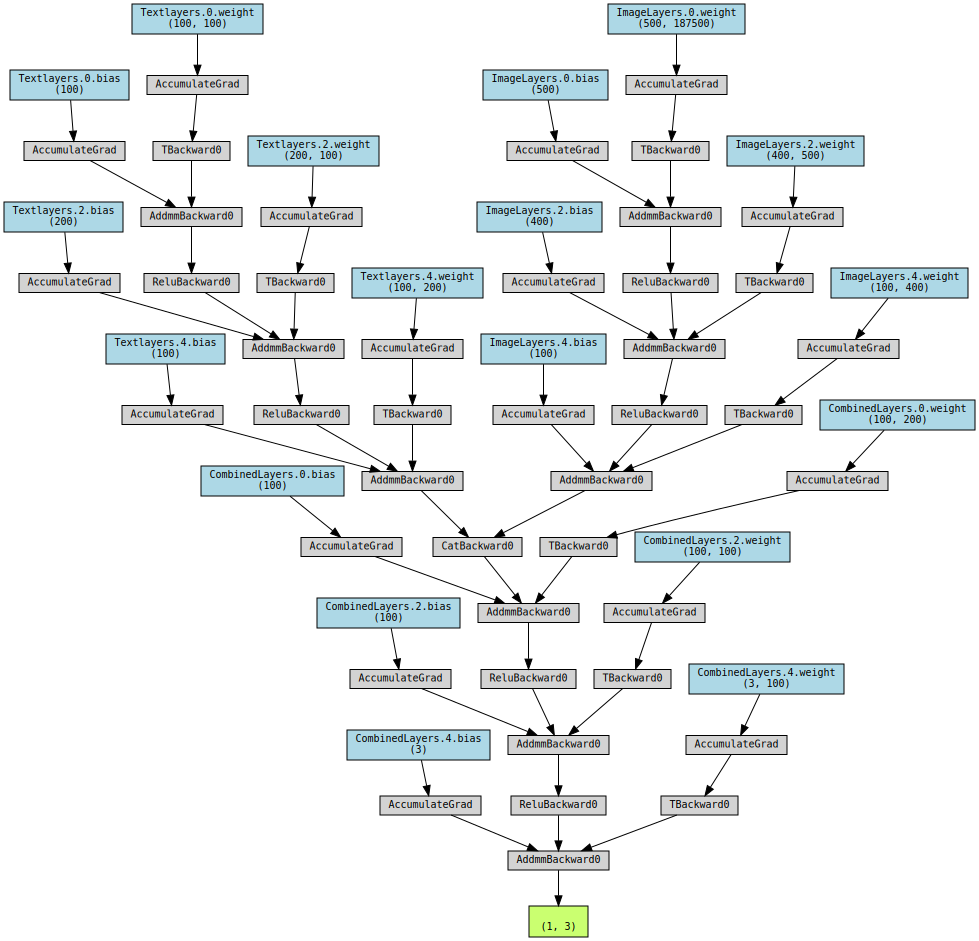

In [28]:
make_dot(model(yy.float().unsqueeze(0),xx.float().unsqueeze(0)), params=dict((model.named_parameters())))